## Data Loading

In [70]:
import tensorflow as tf

BATCH_SIZE = 40
IMG_WIDTH  = 128 
IMG_HEIGHT = 128 
DATASET_DIR = "../input/animals10/raw-img"

In [71]:
animals_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  DATASET_DIR,
  seed = 37,
  image_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = BATCH_SIZE, 
  labels = 'inferred'
)

Found 26179 files belonging to 10 classes.


## Data Exploration

In [72]:
import pandas as pd

In [73]:
def countTuplesByClass(x,y):
    dataset_unbatched = tuple(x.unbatch())
    labels = []
    for (image,label) in dataset_unbatched:
        labels.append(label.numpy())
    labels = pd.Series(labels)
    counts = labels.value_counts()
    
    for i in range(len(counts)):
        print(y[i] + "\t\t" + str(counts[i]))

In [74]:
animals_names = animals_dataset.class_names
animals_names

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [75]:
countTuplesByClass(animals_dataset,animals_names)

2022-10-16 11:45:18.344354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
2022-10-16 11:45:18.617097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-10-16 11:45:18.620298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:45:18.977922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:45:19.739693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:45:20.703698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:45:21.840235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup 

cane		4863
cavallo		2623
elefante		1446
farfalla		2112
gallina		3098
gatto		1668
mucca		1866
pecora		1820
ragno		4821
scoiattolo		1862


In [76]:
animals_dataset.take(1)

<TakeDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>

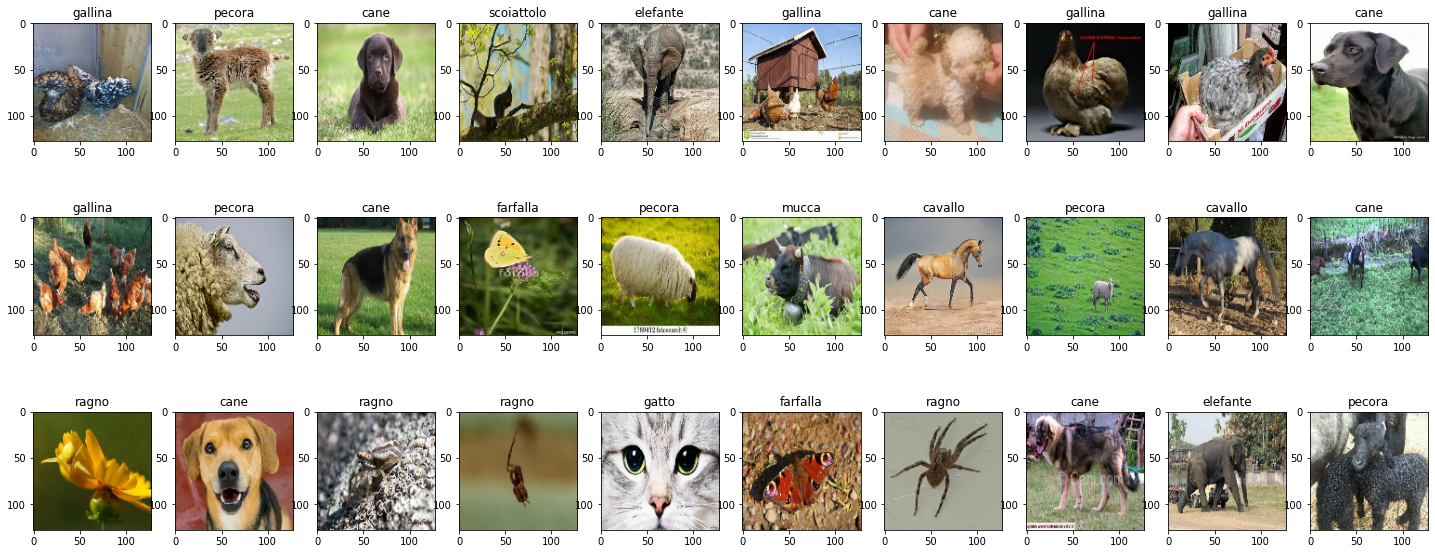

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 28))

for images, labels in animals_dataset.take(1):
    for i in range(30):
        ax = plt.subplot(8, 10, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(animals_names[labels[i]])

## Data Transformation

In [78]:
# An function for obtaining balanced sets for modeling and checking accuracy
def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return val_ds, test_ds, train_ds

In [79]:
# Because I use a batchdataset the size is calculated in the number of batches. Thefore I need to calculate the size to be used in the function.
# len / batch size
26179 / BATCH_SIZE

654.475

In [80]:
len(animals_dataset)

655

In [81]:
validation_set, test_set, training_set = get_dataset_partitions_tf(animals_dataset,654,train_split=0.6, val_split=0.2, test_split=0.2, shuffle=True, shuffle_size=10000)

In [82]:
countTuplesByClass(training_set, animals_names)

2022-10-16 11:45:42.774349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
2022-10-16 11:45:43.014215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-10-16 11:45:43.015095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:45:43.356645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:45:44.024021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:45:44.932525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:45:45.692665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup 

cane		2939
cavallo		1561
elefante		877
farfalla		1236
gallina		1842
gatto		982
mucca		1119
pecora		1121
ragno		2913
scoiattolo		1090


In [83]:
countTuplesByClass(validation_set, animals_names)

2022-10-16 11:46:03.348550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
2022-10-16 11:46:03.599922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-10-16 11:46:03.605807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:46:03.951642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:46:04.627902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:46:05.523065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:46:06.277640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup 

cane		1004
cavallo		490
elefante		293
farfalla		428
gallina		592
gatto		344
mucca		385
pecora		374
ragno		913
scoiattolo		377


In [84]:
countTuplesByClass(test_set, animals_names)

2022-10-16 11:46:21.598225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
2022-10-16 11:46:21.823909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-10-16 11:46:21.826943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:46:22.160549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:46:22.796695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:46:23.679864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:46:24.423031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup 

cane		1007
cavallo		501
elefante		276
farfalla		466
gallina		633
gatto		365
mucca		360
pecora		356
ragno		972
scoiattolo		384


### Hot Encoding

In [85]:
tf.one_hot([0,1,2], len(animals_names))

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [86]:
def fixing_images(images,y):
    return images/255, tf.one_hot(y, len(animals_names))

In [87]:
training_set = training_set.prefetch(128)
validation_set = validation_set.prefetch(128)
test_set = test_set.prefetch(128)

In [88]:
test_set.take(1)

<TakeDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>

In [89]:
X_train = training_set.map(lambda x, y : fixing_images(x,y))

In [90]:
X_valid = validation_set.map(lambda x, y : fixing_images(x,y))

In [91]:
X_test = test_set.map(lambda x, y : fixing_images(x,y))

## Modelling
### Creating Model

In [92]:
regularizer = tf.keras.regularizers.l1_l2(0, 0.001)

In [93]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, input_shape = [IMG_WIDTH, IMG_HEIGHT, 3], kernel_size = 3, 
                                padding = 'same', kernel_regularizer=regularizer, activation=tf.keras.activations.relu),
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Conv2D(64, kernel_size = 3,
                                padding = 'same', kernel_regularizer=regularizer, activation=tf.keras.activations.relu),
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Conv2D(128, kernel_size = 3,
                                padding = 'same', kernel_regularizer=regularizer, activation=tf.keras.activations.relu),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1000, kernel_regularizer=regularizer, activation=tf.keras.activations.relu),
            tf.keras.layers.Dense(500, kernel_regularizer=regularizer, activation=tf.keras.activations.relu),
            tf.keras.layers.Dense(len(animals_names), kernel_regularizer=regularizer),
            tf.keras.layers.Softmax()
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)             

In [94]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 7, restore_best_weights = True)

In [95]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [96]:
history = model.fit(X_train,validation_data = X_valid,  epochs = 30,callbacks = [early_stopping])

Epoch 1/30


2022-10-16 11:46:41.508423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
2022-10-16 11:46:41.744467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-10-16 11:46:41.748411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:46:42.080148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:46:42.861286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:46:43.872193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup called...
2022-10-16 11:46:44.619416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Cleanup called...
Cleanup 

  1/392 [..............................] - ETA: 2:21:07 - loss: 5.1040 - accuracy: 0.1000

KeyboardInterrupt: 

### Visualization Training/Valid Results

In [ ]:
import matplotlib.pyplot as plt

def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric], ls='dashed')
        ax[idx].set_xlabel("Epochs")
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history['val_' + metric])
        ax[idx].legend([metric, 'val_' + metric])